## Unsupervised Learning to Predict Race from Merged Dataset

In [1]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Inspect

In [2]:
full_data_df = pd.read_csv('final_merged.csv')
full_data_df

print("Shape of the data: ", full_data_df.shape)

full_data_df.info()
full_data_df.head()

Shape of the data:  (9222, 140)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9222 entries, 0 to 9221
Columns: 140 entries, Patient ID to Survival Months
dtypes: float64(77), int64(2), object(61)
memory usage: 9.9+ MB


/tmp/ipykernel_29693/3584519652.py:1: DtypeWarning: Columns (0,3,4,5,6,7,9,12,15,16,17,18,22,24,26,28,29,30,40,65,66,67,68,69,70,71,72,73,74,75,76,82,83,89,90,91,92,93,96,97,98,99,100,101,102,103,104,105,106,107,108,109,115) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data_df = pd.read_csv('final_merged.csv')


,Patient ID,Age,Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Unnamed: 3,T Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,Breast_MRI_001,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Poorly differentiated; Grade III,Regional,Positive,Negative,6.0,1.0,66.0
1,Breast_MRI_001,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Moderately differentiated; Grade II,Regional,Positive,Positive,9.0,1.0,72.0
2,Breast_MRI_002,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast_MRI_003,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Poorly differentiated; Grade III,Regional,Positive,Positive,6.0,1.0,52.0
4,Breast_MRI_003,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Moderately differentiated; Grade II,Regional,Positive,Positive,19.0,1.0,55.0


## Data Cleaning

In [13]:
#Dropping any duplicate rows
full_data_df.drop_duplicates(inplace=True)

# Drop features with a lot of missing values
missing__ratio = full_data_df.isnull().mean()
columns_to_drop = missing__ratio[missing__ratio > 0.8].index
full_data_df.drop(columns=columns_to_drop, inplace=True)


In [15]:
# Look at new shape of the data
print("Shape of the data after dropping columns with a lot of missing values: ", full_data_df.shape)

Shape of the data after dropping columns with a lot of missing values:  (6693, 111)


In [16]:
#inspecting the race column
full_data_df['Race'].value_counts(dropna=False)

#Drop rows with missing values in Race column

full_data_df = full_data_df.dropna(subset=['Race'])

#Drop rows where race is = 0
full_data_df = full_data_df[full_data_df['Race'] != 0]

full_data_df['Race'].value_counts()

Race
1.0    5856
2.0     470
4.0     321
5.0      18
3.0      14
6.0       9
8.0       4
7.0       1
Name: count, dtype: int64

## EDA

In [17]:
full_data_df.describe()

,Age,ER,HER2,Histologic type,PR,Tumor Size,T Stage,Days to MRI (From the Date of Diagnosis),Manufacturer,Manufacturer Model Name,...,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure),Race,N Stage,Regional Node Examined,Reginol Node Positive,Survival Months
count,6693.000000,4944.000000,4944.000000,6693.000000,4944.000000,6056.000000,6687.000000,4944.000000,4944.000000,4944.000000,...,1722.000000,1673.000000,1929.000000,1929.000000,1929.00000,6693.000000,6671.000000,6056.000000,6056.000000,6056.000000
mean,53.247124,0.803600,0.189523,0.596145,0.702063,28.519815,1.708689,12.528519,0.582120,2.893811,...,0.660859,-0.982666,0.444272,0.670295,2.39606,1.240849,1.204317,13.934610,3.410337,72.084544
std,8.718803,0.397314,0.391963,0.623003,0.457398,19.264544,0.714212,17.320590,0.908594,1.904946,...,0.837785,0.180538,0.770387,0.890914,4.75256,0.750747,0.685523,8.070807,4.475298,22.470205
min,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-123.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,47.000000,1.000000,0.000000,0.000000,0.000000,16.000000,1.000000,7.000000,0.000000,1.000000,...,0.000000,-1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,8.000000,1.000000,57.000000
50%,53.000000,1.000000,0.000000,1.000000,1.000000,23.000000,2.000000,12.000000,0.000000,3.000000,...,1.000000,-1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,13.000000,2.000000,74.000000
75%,60.000000,1.000000,0.000000,1.000000,1.000000,35.000000,2.000000,19.250000,2.000000,4.000000,...,1.000000,-1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,18.000000,3.000000,90.000000
max,89.000000,1.000000,1.000000,9.000000,1.000000,140.000000,4.000000,381.000000,2.000000,7.000000,...,3.000000,1.000000,3.000000,3.000000,19.00000,8.000000,3.000000,61.000000,46.000000,107.000000


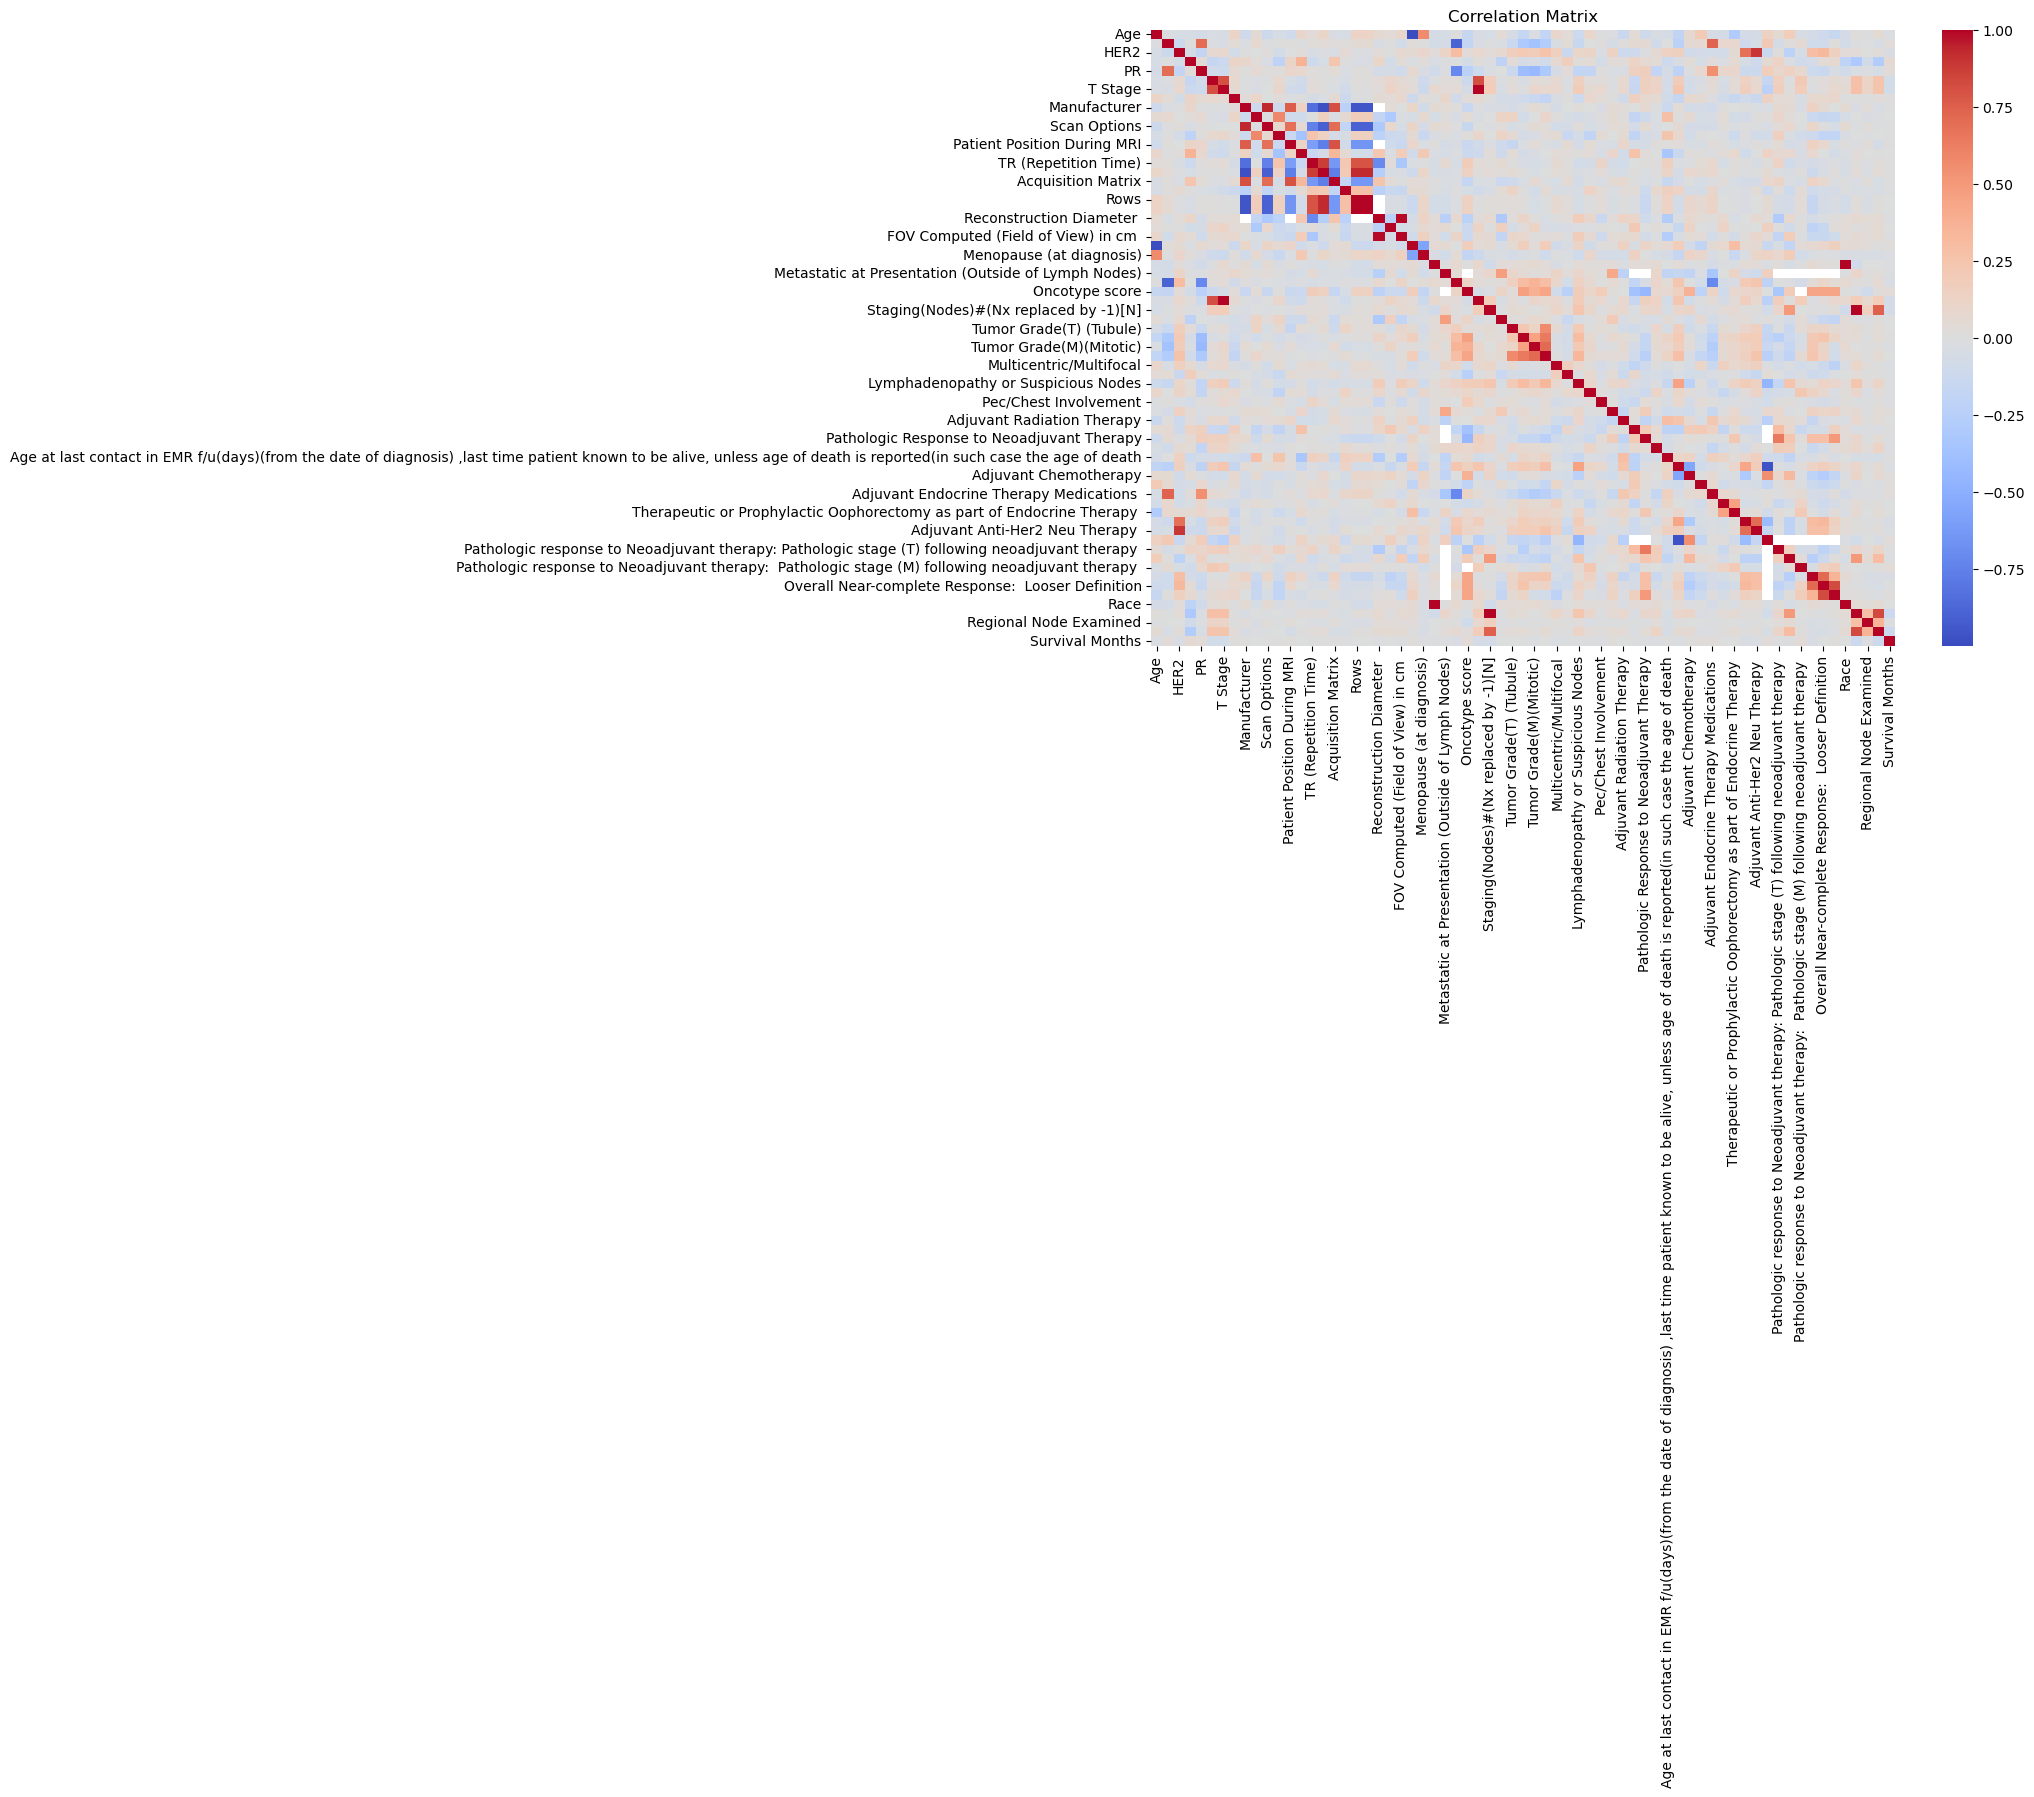

In [18]:
#Coorelation heatmap for numerical features

numeric_features = full_data_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Guassian and PCA

In [46]:
from sklearn.preprocessing import StandardScaler

# Assuming 'full_data_df' is your merged breast cancer dataset
# Define race label and drop it from feature set
target_col = 'Race'

# 1. Drop columns with too much missing data (>80% missing already dropped earlier)
# 2. Keep only numeric columns (Naive Bayes needs numeric features)
numeric_cols = full_data_df.select_dtypes(include=[np.number]).columns.drop(target_col)
features = numeric_cols

# Strategy 1: Drop rows with any missing values
df_dropped = full_data_df[features.union([target_col])].dropna()

# Strategy 2: Fill numeric NaNs with column means
df_filled = full_data_df[features.union([target_col])].copy()
df_filled[features] = df_filled[features].fillna(df_filled[features].mean())

# Scale features
scaler = StandardScaler()
df_dropped[features] = scaler.fit_transform(df_dropped[features])
df_filled[features] = scaler.fit_transform(df_filled[features])

print("Dropped dataset shape:", df_dropped.shape)
print("Filled dataset shape:", df_filled.shape)


Dropped dataset shape: (118, 67)
Filled dataset shape: (6693, 67)



Feature Subset Size: 5
Selected Features: ['Tumor Size', 'Recurrence event(s)', 'Pathologic Response to Neoadjuvant Therapy', 'Oncotype score', 'Staging(Metastasis)#(Mx -replaced by -1)[M]']
Accuracy: 0.6490


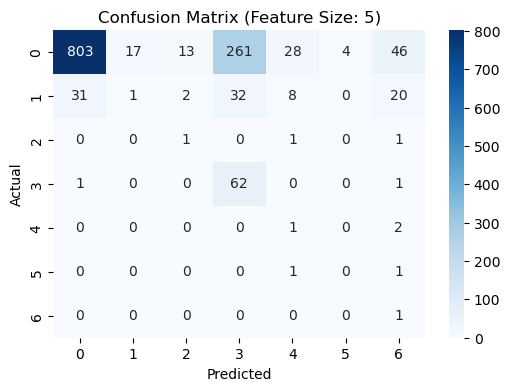


Feature Subset Size: 7
Selected Features: ['Manufacturer Model Name', 'Age', 'Overall Near-complete Response:  Looser Definition', 'Adjuvant Chemotherapy', 'Reginol Node Positive', 'Mol Subtype', 'N Stage']
Accuracy: 0.6617


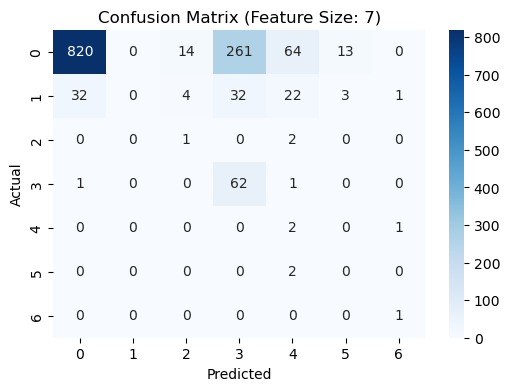


Feature Subset Size: 10
Selected Features: ['Age at last contact in EMR f/u(days)(from the date of diagnosis) ,last time patient known to be alive, unless age of death is reported(in such case the age of death', 'Overall Near-complete Response:  Stricter Definition', 'Neoadjuvant Radiation Therapy', 'Reconstruction Diameter ', 'Skin/Nipple Invovlement', 'PR', 'Reginol Node Positive', 'Known Ovarian Status ', 'FOV Computed (Field of View) in cm ', 'Flip Angle ']
Accuracy: 0.6580


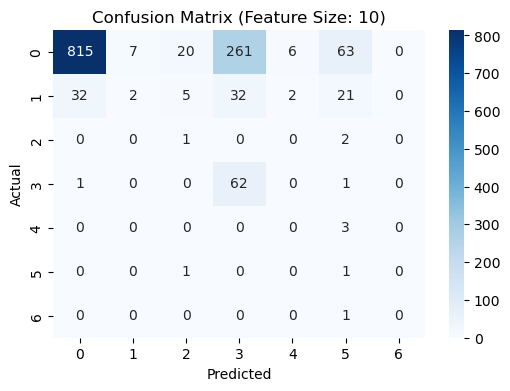

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Define features and target
X = df_filled[features]
y = df_filled[target_col]

# Drop classes with fewer than 2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index

X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Test different subset sizes
feature_sizes = [5, 7, 10]
results = {}

for size in feature_sizes:
    selected_features = random.sample(list(X.columns), size)
    
    model = GaussianNB()
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[size] = {
        "features": selected_features,
        "accuracy": acc,
        "conf_matrix": conf_matrix
    }
    
    print(f"\nFeature Subset Size: {size}")
    print("Selected Features:", selected_features)
    print(f"Accuracy: {acc:.4f}")
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (Feature Size: {size})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Naive Bayes Accuracy (All Features): 0.7588
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.76      0.86      1172
         2.0       0.67      0.66      0.67        94
         3.0       1.00      1.00      1.00         3
         4.0       0.17      0.97      0.30        64
         5.0       1.00      1.00      1.00         3
         6.0       1.00      0.50      0.67         2
         8.0       0.00      0.00      0.00         1

    accuracy                           0.76      1339
   macro avg       0.69      0.70      0.64      1339
weighted avg       0.94      0.76      0.82      1339



/home/austi/miniconda3/envs/msse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/austi/miniconda3/envs/msse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/austi/miniconda3/envs/msse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

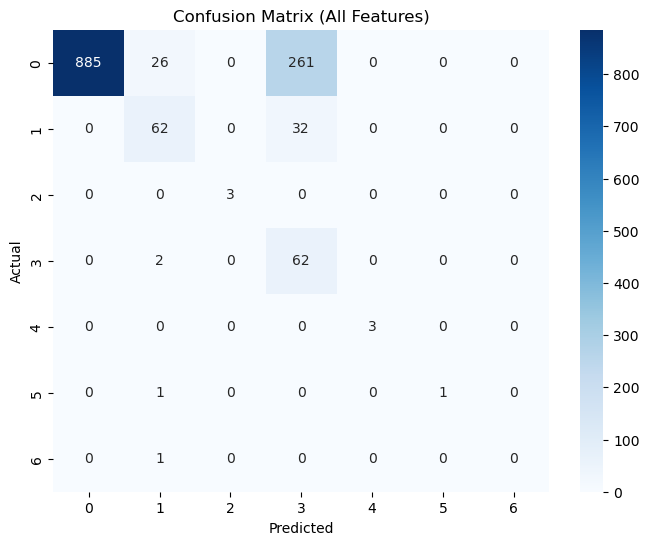

In [49]:
# Baseline model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train full-feature Naive Bayes model
model_full = GaussianNB()
model_full.fit(X_train, y_train)

# Predict on test set
y_pred_full = model_full.predict(X_test)

# Evaluate
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Naive Bayes Accuracy (All Features): {accuracy_full:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_full))

# Confusion Matrix
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (All Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



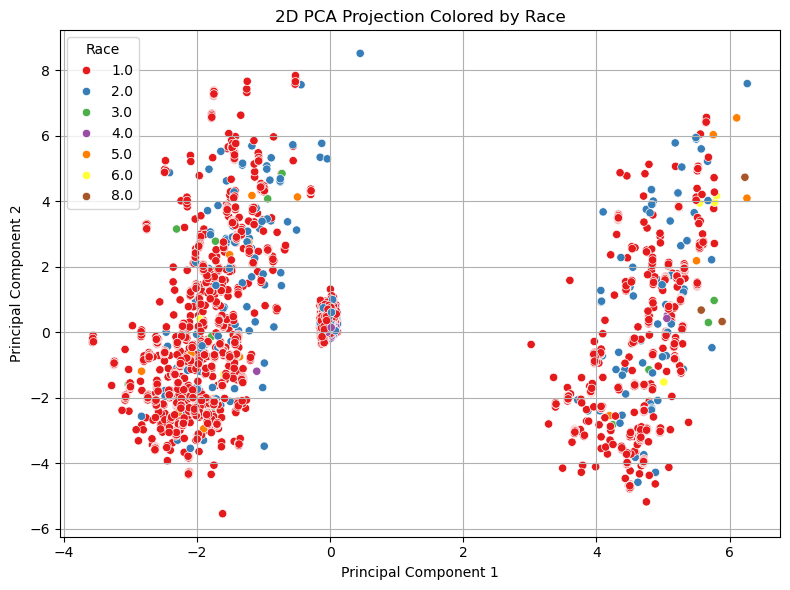

In [50]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca_vis = PCA(n_components=2)
X_train_pca_2d = pca_vis.fit_transform(X_train)

# Plot PCA components colored by Race
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca_2d[:, 0], y=X_train_pca_2d[:, 1], hue=y_train, palette="Set1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection Colored by Race")
plt.legend(title="Race")
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation

Number of PCA components selected: 36
Naive Bayes Accuracy (PCA Features): 0.7700


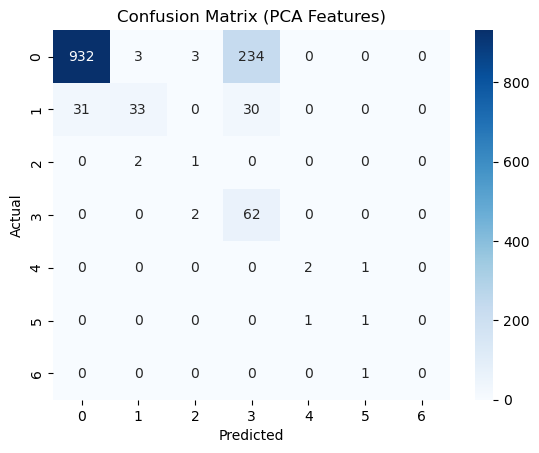

Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.80      0.87      1172
         2.0       0.87      0.35      0.50        94
         3.0       0.17      0.33      0.22         3
         4.0       0.19      0.97      0.32        64
         5.0       0.67      0.67      0.67         3
         6.0       0.33      0.50      0.40         2
         8.0       0.00      0.00      0.00         1

    accuracy                           0.77      1339
   macro avg       0.46      0.52      0.43      1339
weighted avg       0.92      0.77      0.82      1339



/home/austi/miniconda3/envs/msse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/austi/miniconda3/envs/msse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/austi/miniconda3/envs/msse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [51]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit PCA to retain 90% variance
pca_final = PCA(n_components=0.90)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

print(f"Number of PCA components selected: {pca_final.n_components_}")

# Train and predict
model_pca = GaussianNB()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Naive Bayes Accuracy (PCA Features): {acc_pca:.4f}")

conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (PCA Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_pca))
